## Checking the implementation

We run the algorithm with order 2 tensors (i.e. matrices) to check our implementation does what we expect it to do. Here we plot some graphs showing the achieved correlation.

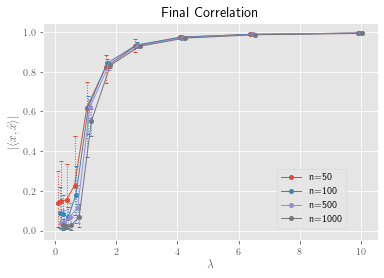

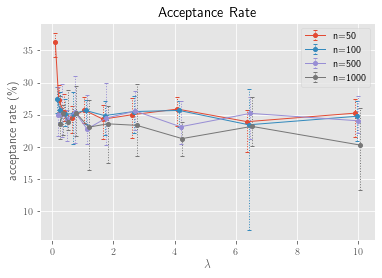

In [47]:
import matplotlib.pyplot as plt
from matplotlib import container
import numpy as np
import pickle
import os
from itertools import chain

# Loading the data
RUNS = [
        "n50_d2_06-09_15:54.pkl",
        "n100_d2_06-09_21:32.pkl",
        "n500_d2_07-09_02:29.pkl",
        "n1000_d2_07-09_07:06.pkl",
]

results = []
for run in RUNS:
    with open(f"./data/lambda/{run}", "rb") as f:
        results += [pickle.load(f)]

run = run[6:-4]
if not os.path.exists(f"figures/lambda/{run}"):
    os.makedirs(f"figures/lambda/{run}")

dims = list(set([dim['params']["dim"] for dim in results]))
dims.sort()
n_dims = len(dims)

lambdas = results[0]['params']['lambdas']
lambdas = np.array(lambdas)
n_lambdas = len(lambdas)

correlations = [d['correlations'] for dim in results for d in dim['results']]
steps = np.array([len(corr_array) for corrs_list in correlations for corr_array in corrs_list]).reshape(n_dims * n_lambdas, -1)
final_correlations = np.abs(
    [run[-1] for correlation_list in correlations for run in correlation_list]
).reshape(n_lambdas * n_dims, -1)

acceptance_rates = np.array([d['acceptance_rates'] for dim in results for d in dim['results']])

labels = {i: f"n={dim}" for i, dim in enumerate(dims)}
n_pairs = acceptance_rates.shape[1]


# plotting
with plt.style.context("ggplot"):
    plt.rc("text", usetex=True)

    # correlation plot
    fig, axes = plt.subplots(nrows=1)

    for i in range(n_dims):
        means = final_correlations.mean(axis=1)[i * n_lambdas : (i + 1) * n_lambdas]
        mins = final_correlations.min(axis=1)[i * n_lambdas : (i + 1) * n_lambdas]
        maxs = final_correlations.max(axis=1)[i * n_lambdas : (i + 1) * n_lambdas]
        eb = axes.errorbar(
            (i - 2) * 0.05 + lambdas,
            means,
            yerr=[means - mins, maxs - means],
            label=labels[i],
            fmt="o-",
            linewidth=1,
            markersize=4,
            capsize=2,
            elinewidth=1,
        )
        eb[-1][0].set_linestyle(":")
    plt.title(f"Final Correlation")
    # plt.title("Errorbars show min/max", fontsize=10)
    axes.set_xlabel(r"$\lambda$")
    axes.set_ylabel(r"$|\langle x, \hat{x}\rangle |$")

    handles, labels = axes.get_legend_handles_labels()
    handles = [
        h[0] if isinstance(h, container.ErrorbarContainer) else h for h in handles
    ]

    plt.grid(True)
    fig.legend(handles, labels, loc=(0.72,.18))
    # fig.subplots_adjust(right=0.82)
    plt.savefig(f"figures/lambda/{run}/correlations.png", dpi=900)

    # acceptance rate plot
    plt.figure()

    for i in range(n_dims):
        means = 100 * acceptance_rates.mean(axis=1)[i * n_lambdas : (i + 1) * n_lambdas]
        mins = 100 * acceptance_rates.min(axis=1)[i * n_lambdas : (i + 1) * n_lambdas]
        maxs = 100 * acceptance_rates.max(axis=1)[i * n_lambdas : (i + 1) * n_lambdas]
        eb = plt.errorbar(
            (i - 2) * 0.05 + lambdas,
            means,
            yerr=[means - mins, maxs - means],
            label=labels[i],
            fmt="o-",
            linewidth=1,
            markersize=4,
            capsize=2,
            elinewidth=1,
        )
        eb[-1][0].set_linestyle(":")
    plt.title("Acceptance Rate")
    # plt.title("Errorbars show min/max", fontsize=10)

    plt.xlabel(r"$\lambda$")
    plt.ylabel(r"acceptance rate (\%)")

    plt.legend()
    plt.savefig(f"figures/lambda/{run}/acceptance_rates.png", dpi=900)

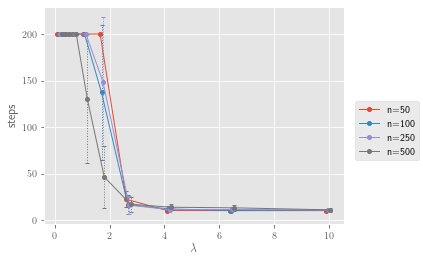

In [36]:
# Loading the data
run = "corr_11-05-2022_22:30"
filename = f"./data/lambda/{run}.pkl"
with open(filename, "rb") as f:
    results = pickle.load(f)

runtimes = np.array([l["runtimes"] for l in results])

# plotting
with plt.style.context("ggplot"):
    plt.rc("text", usetex=True)

    # number of iterations plot
    fig, axes = plt.subplots(nrows=1)

    for i in range(n_dims):
        means = steps.mean(axis=1)[i * n_lambdas : (i + 1) * n_lambdas]
        std = steps.std(axis=1)[i * n_lambdas : (i + 1) * n_lambdas]
        eb = axes.errorbar(
            (i - 2) * 0.05 + lambdas,
            means,
            yerr=std,
            label=labels[i],
            fmt="o-",
            linewidth=1,
            markersize=4,
            capsize=2,
            elinewidth=1,
        )
        eb[-1][0].set_linestyle(":")
    axes.set_xlabel(r"$\lambda$")
    axes.set_ylabel(r"steps")

    handles, labels = axes.get_legend_handles_labels()
    handles = [
        h[0] if isinstance(h, container.ErrorbarContainer) else h for h in handles
    ]

    fig.legend(handles, labels, loc=7)
    fig.subplots_adjust(right=0.82)
    plt.savefig(f"figures/lambda/{run}/n_iterations.png", dpi=900)


### SNR threshold

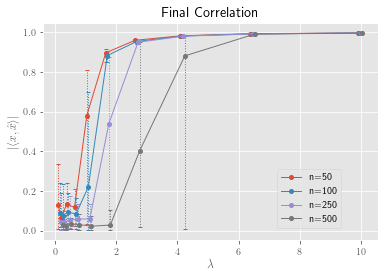

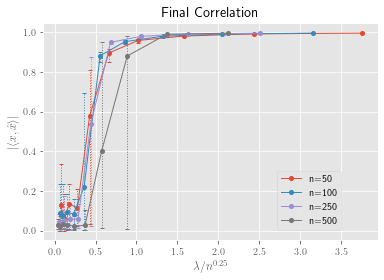

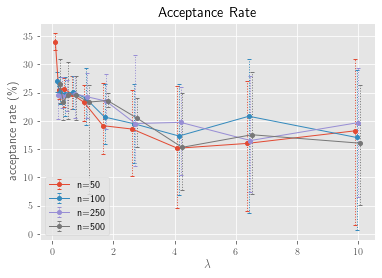

In [46]:
import matplotlib.pyplot as plt
from matplotlib import container
import numpy as np
import pickle
import os
from itertools import chain

# Loading the data
runs = [
        "lambda/n50_d3_09-09_15:56.pkl",
        "lambda/n100_d3_09-09_21:30.pkl",
        "lambda/n250_d3_10-09_03:00.pkl",
        "lambda/n500_d3_10-09_18:58.pkl",
]
results = []
for run in runs:
    with open(f"./data/{run}", "rb") as f:
        results += [(pickle.load(f))]

run = run[12:-4]
if not os.path.exists(f"figures/lambda/{run}"):
    os.makedirs(f"figures/lambda/{run}")

dims = np.array([l['params']['dim'] for l in results])
dims.sort()
n_dims = len(dims)
lambdas = np.array(results[0]['params']['lambdas'])
n_lambdas = len(lambdas)


correlations = [d['correlations'] for l in results for d in l['results']]
final_correlations = np.abs([run[-1] for reps_list in correlations for run in reps_list]).reshape(n_dims * n_lambdas, -1)
acceptance_rates = np.array([d['acceptance_rates'] for l in results for d in l['results']])
n_runs = acceptance_rates.shape[1]

labels = {i: f"n={dim}" for i, dim in enumerate(dims)}
n_reps = acceptance_rates.shape[1]

steps = np.array([len(corr_array) for corrs_list in correlations for corr_array in corrs_list]).reshape(n_dims * n_lambdas, -1)


# plotting
with plt.style.context("ggplot"):
    plt.rc("text", usetex=True)

    # correlation plot
    fig, axes = plt.subplots(nrows=1)

    for i in range(n_dims):
        means = final_correlations.mean(axis=1)[i * n_lambdas : (i + 1) * n_lambdas]
        mins = final_correlations.min(axis=1)[i * n_lambdas : (i + 1) * n_lambdas]
        maxs = final_correlations.max(axis=1)[i * n_lambdas : (i + 1) * n_lambdas]
        eb = axes.errorbar(
            (i - 2) * 0.05 + lambdas,
            means,
            yerr=[means - mins, maxs - means],
            label=labels[i],
            fmt="o-",
            linewidth=1,
            markersize=4,
            capsize=2,
            elinewidth=1,
        )
        eb[-1][0].set_linestyle(":")
    plt.title(f"Final Correlation")
    axes.set_xlabel(r"$\lambda$")
    axes.set_ylabel(r"$|\langle x, \hat{x}\rangle |$")

    handles, labels = axes.get_legend_handles_labels()
    handles = [
        h[0] if isinstance(h, container.ErrorbarContainer) else h for h in handles
    ]    
    fig.legend(handles, labels, loc=(0.72,.18))
    plt.savefig(f"figures/lambda/{run}/correlations.pdf", format="pdf")

    # correlation plot with scaled x-axis
    fig, axes = plt.subplots(nrows=1)

    for i, dim in enumerate(dims):
        means = final_correlations.mean(axis=1)[i * n_lambdas : (i + 1) * n_lambdas]
        mins = final_correlations.min(axis=1)[i * n_lambdas : (i + 1) * n_lambdas]
        maxs = final_correlations.max(axis=1)[i * n_lambdas : (i + 1) * n_lambdas]
        eb = axes.errorbar(
            lambdas / dim**0.25,
            means,
            yerr=[means - mins, maxs - means],
            label=labels[i],
            fmt="o-",
            linewidth=1,
            markersize=4,
            capsize=2,
            elinewidth=1,
        )
        eb[-1][0].set_linestyle(":")
    plt.title(f"Final Correlation")
    axes.set_xlabel(r"$\lambda/n^{0.25}$")
    axes.set_ylabel(r"$|\langle x, \hat{x}\rangle |$")

    handles, labels = axes.get_legend_handles_labels()
    handles = [
        h[0] if isinstance(h, container.ErrorbarContainer) else h for h in handles
    ]
    fig.legend(handles, labels, loc=(0.72,.18))
    plt.savefig(f"figures/lambda/{run}/correlations_scaledaxis.pdf", format="pdf")

    # acceptance rate plot
    plt.figure()

    for i in range(n_dims):
        means = 100 * acceptance_rates.mean(axis=1)[i * n_lambdas : (i + 1) * n_lambdas]
        mins = 100 * acceptance_rates.min(axis=1)[i * n_lambdas : (i + 1) * n_lambdas]
        maxs = 100 * acceptance_rates.max(axis=1)[i * n_lambdas : (i + 1) * n_lambdas]
        eb = plt.errorbar(
            (i - 2) * 0.05 + lambdas,
            means,
            yerr=[means - mins, maxs - means],
            label=labels[i],
            fmt="o-",
            linewidth=1,
            markersize=4,
            capsize=2,
            elinewidth=1,
        )
        eb[-1][0].set_linestyle(":")
    plt.title("Acceptance Rate")

    plt.xlabel(r"$\lambda$")
    plt.ylabel(r"acceptance rate (\%)")

    plt.legend()
    plt.savefig(f"figures/lambda/{run}/acceptance_rates.pdf", format="pdf")

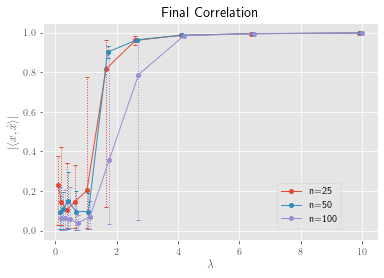

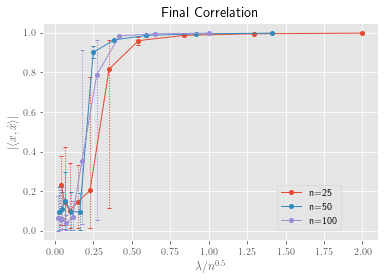

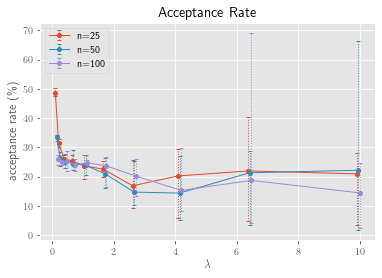

In [52]:
import matplotlib.pyplot as plt
from matplotlib import container
import numpy as np
import pickle
import os
from itertools import chain

# Loading the data
runs = [
        "lambda/n25_d4_09-09_16:36.pkl",
        "lambda/n50_d4_09-09_23:00.pkl",
        "lambda/n100_d4_11-09_07:56.pkl",
        # "lambda/n140_d4_11-09_18:58.pkl",
]
results = []
for run in runs:
    with open(f"./data/{run}", "rb") as f:
        results += [(pickle.load(f))]

run = run[12:-4]
if not os.path.exists(f"figures/lambda/{run}"):
    os.makedirs(f"figures/lambda/{run}")

dims = np.array([l['params']['dim'] for l in results])
dims.sort()
n_dims = len(dims)
lambdas = np.array(results[0]['params']['lambdas'])
n_lambdas = len(lambdas)


correlations = [d['correlations'] for l in results for d in l['results']]
final_correlations = np.abs([run[-1] for reps_list in correlations for run in reps_list]).reshape(n_dims * n_lambdas, -1)
acceptance_rates = np.array([d['acceptance_rates'] for l in results for d in l['results']])
n_runs = acceptance_rates.shape[1]

labels = {i: f"n={dim}" for i, dim in enumerate(dims)}
n_reps = acceptance_rates.shape[1]

steps = np.array([len(corr_array) for corrs_list in correlations for corr_array in corrs_list]).reshape(n_dims * n_lambdas, -1)


# plotting
with plt.style.context("ggplot"):
    plt.rc("text", usetex=True)

    # correlation plot
    fig, axes = plt.subplots(nrows=1)

    for i in range(n_dims):
        means = final_correlations.mean(axis=1)[i * n_lambdas : (i + 1) * n_lambdas]
        mins = final_correlations.min(axis=1)[i * n_lambdas : (i + 1) * n_lambdas]
        maxs = final_correlations.max(axis=1)[i * n_lambdas : (i + 1) * n_lambdas]
        eb = axes.errorbar(
            (i - 2) * 0.05 + lambdas,
            means,
            yerr=[means - mins, maxs - means],
            label=labels[i],
            fmt="o-",
            linewidth=1,
            markersize=4,
            capsize=2,
            elinewidth=1,
        )
        eb[-1][0].set_linestyle(":")
    plt.title(f"Final Correlation")
    axes.set_xlabel(r"$\lambda$")
    axes.set_ylabel(r"$|\langle x, \hat{x}\rangle |$")

    handles, labels = axes.get_legend_handles_labels()
    handles = [
        h[0] if isinstance(h, container.ErrorbarContainer) else h for h in handles
    ]    
    fig.legend(handles, labels, loc=(0.72,.18))
    plt.savefig(f"figures/lambda/{run}/correlations.pdf", format="pdf")

    # correlation plot with scaled x-axis
    fig, axes = plt.subplots(nrows=1)

    for i, dim in enumerate(dims):
        means = final_correlations.mean(axis=1)[i * n_lambdas : (i + 1) * n_lambdas]
        mins = final_correlations.min(axis=1)[i * n_lambdas : (i + 1) * n_lambdas]
        maxs = final_correlations.max(axis=1)[i * n_lambdas : (i + 1) * n_lambdas]
        eb = axes.errorbar(
            lambdas / dim**0.5,
            means,
            yerr=[means - mins, maxs - means],
            label=labels[i],
            fmt="o-",
            linewidth=1,
            markersize=4,
            capsize=2,
            elinewidth=1,
        )
        eb[-1][0].set_linestyle(":")
    plt.title(f"Final Correlation")
    axes.set_xlabel(r"$\lambda/n^{0.5}$")
    axes.set_ylabel(r"$|\langle x, \hat{x}\rangle |$")

    handles, labels = axes.get_legend_handles_labels()
    handles = [
        h[0] if isinstance(h, container.ErrorbarContainer) else h for h in handles
    ]
    fig.legend(handles, labels, loc=(0.72,.18))
    plt.savefig(f"figures/lambda/{run}/correlations_scaledaxis.pdf", format="pdf")

    # acceptance rate plot
    plt.figure()

    for i in range(n_dims):
        means = 100 * acceptance_rates.mean(axis=1)[i * n_lambdas : (i + 1) * n_lambdas]
        mins = 100 * acceptance_rates.min(axis=1)[i * n_lambdas : (i + 1) * n_lambdas]
        maxs = 100 * acceptance_rates.max(axis=1)[i * n_lambdas : (i + 1) * n_lambdas]
        eb = plt.errorbar(
            (i - 2) * 0.05 + lambdas,
            means,
            yerr=[means - mins, maxs - means],
            label=labels[i],
            fmt="o-",
            linewidth=1,
            markersize=4,
            capsize=2,
            elinewidth=1,
        )
        eb[-1][0].set_linestyle(":")
    plt.title("Acceptance Rate")

    plt.xlabel(r"$\lambda$")
    plt.ylabel(r"acceptance rate (\%)")

    plt.legend()
    plt.savefig(f"figures/lambda/{run}/acceptance_rates.pdf", format="pdf")

# Runnning time

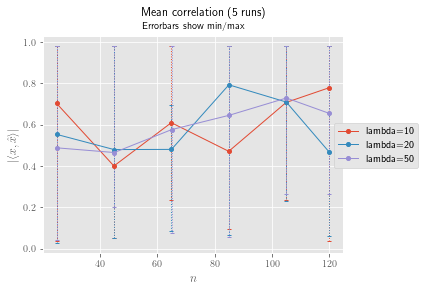

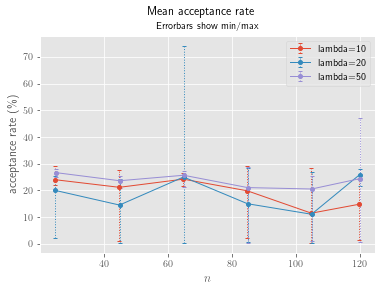

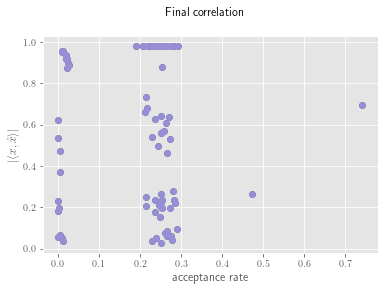

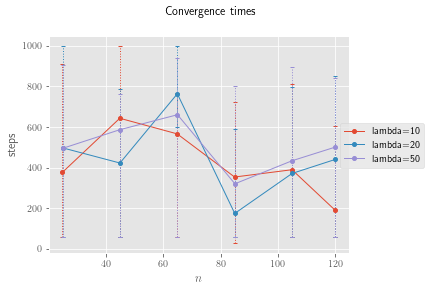

In [3]:
import matplotlib.pyplot as plt
from matplotlib import container
import numpy as np
import pickle
import os
from itertools import chain

# Loading the data
runs = [
        "dim/lambda10_d4_27-08_16:22.pkl",
        "dim/lambda20_d4_27-08_23:42.pkl",
        "dim/lambda50_d4_28-08_07:55.pkl",
]
results = []
for run in runs:
    with open(f"./data/{run}", "rb") as f:
        results += [(pickle.load(f))]

run = run[16:]
if not os.path.exists(f"figures/dim/{run}"):
    os.makedirs(f"figures/dim/{run}")

lambdas = np.array([l['results'][0]['lmbda'] for l in results])
lambdas.sort()
n_lambdas = len(lambdas)
dims = np.array(results[0]['params']['dims'])
n_dims = len(dims)

correlations = [d['correlations'] for l in results for d in l['results']]
final_correlations = np.abs([run[-1] for reps_list in correlations for run in reps_list]).reshape(n_dims * n_lambdas, -1)
acceptance_rates = np.array([d['acceptance_rates'] for l in results for d in l['results']])
n_runs = acceptance_rates.shape[1]

labels = {i: f"lambda={lmbda}" for i, lmbda in enumerate(lambdas)}

steps = np.array([len(corr_array) for corrs_list in correlations for corr_array in corrs_list]).reshape(n_dims * n_lambdas, -1)


# plotting
with plt.style.context("ggplot"):
    plt.rc("text", usetex=True)

    # correlation plot
    fig, axes = plt.subplots(nrows=1)

    for i in range(n_lambdas):
        means = final_correlations.mean(axis=1)[i * n_dims : (i + 1) * n_dims]
        mins = final_correlations.min(axis=1)[i * n_dims : (i + 1) * n_dims]
        maxs = final_correlations.max(axis=1)[i * n_dims : (i + 1) * n_dims]
        eb = axes.errorbar(
            (i - 2) * 0.05 + dims,
            means,
            yerr=[means - mins, maxs - means],
            label=labels[i],
            fmt="o-",
            linewidth=1,
            markersize=4,
            capsize=2,
            elinewidth=1,
        )
        eb[-1][0].set_linestyle(":")
    plt.suptitle(f"Mean correlation ({n_runs} runs)", fontsize=12)
    plt.title("Errorbars show min/max", fontsize=10)
    axes.set_xlabel(r"$n$")
    axes.set_ylabel(r"$|\langle x, \hat{x}\rangle |$")

    handles, labels = axes.get_legend_handles_labels()
    handles = [
        h[0] if isinstance(h, container.ErrorbarContainer) else h for h in handles
    ]

    fig.legend(handles, labels, loc=7)
    fig.subplots_adjust(right=0.82)
    plt.savefig(f"figures/dim/{run}/correlations.png", dpi=900)

    # acceptance rate plot
    plt.figure()

    for i in range(n_lambdas):
        means = 100 * acceptance_rates.mean(axis=1)[i * n_dims : (i + 1) * n_dims]
        mins = 100 * acceptance_rates.min(axis=1)[i * n_dims : (i + 1) * n_dims]
        maxs = 100 * acceptance_rates.max(axis=1)[i * n_dims : (i + 1) * n_dims]
        eb = plt.errorbar(
            (i - 2) * 0.05 + dims,
            means,
            yerr=[means - mins, maxs - means],
            label=labels[i],
            fmt="o-",
            linewidth=1,
            markersize=4,
            capsize=2,
            elinewidth=1,
        )
        eb[-1][0].set_linestyle(":")
    plt.suptitle("Mean acceptance rate", fontsize=12)
    plt.title("Errorbars show min/max", fontsize=10)

    plt.xlabel(r"$n$")
    plt.ylabel(r"acceptance rate (\%)")

    plt.legend()
    plt.savefig(f"figures/dim/{run}/acceptance_rates.png", dpi=900)

    # acceptance rate vs. final correlation
    plt.figure()

    for i in range(n_lambdas):
        plt.scatter(acceptance_rates.reshape(-1), final_correlations.reshape(-1))
    eb[-1][0].set_linestyle(":")
    plt.suptitle(f"Final correlation")
    plt.xlabel(f"acceptance rate")
    plt.ylabel(r"$|\langle x, \hat{x}\rangle |$")

    handles, labels = axes.get_legend_handles_labels()
    handles = [
        h[0] if isinstance(h, container.ErrorbarContainer) else h for h in handles
    ]

    fig.legend(handles, labels, loc=7)
    fig.subplots_adjust(right=0.82)
    plt.savefig(f"figures/dim/{run}/acc_rate_vs_correlation.png", dpi=900)

    # dim vs. total steps
    fig, axes = plt.subplots(nrows=1)

    for i in range(n_lambdas):
        means = steps.mean(axis=1)[i * n_dims : (i + 1) * n_dims]
        mins = steps.min(axis=1)[i * n_dims : (i + 1) * n_dims]
        maxs = steps.max(axis=1)[i * n_dims : (i + 1) * n_dims]
        eb = axes.errorbar(
            (i - 2) * 0.05 + dims,
            means,
            yerr=[means - mins, maxs - means],
            label=labels[i],
            fmt="o-",
            linewidth=1,
            markersize=4,
            capsize=2,
            elinewidth=1,
        )
        eb[-1][0].set_linestyle(":")
    plt.suptitle(f"Convergence times")
    axes.set_xlabel(r"$n$")
    axes.set_ylabel(r"steps")

    handles, labels = axes.get_legend_handles_labels()
    handles = [
        h[0] if isinstance(h, container.ErrorbarContainer) else h for h in handles
    ]

    fig.legend(handles, labels, loc=7)
    fig.subplots_adjust(right=0.82)
    plt.savefig(f"figures/dim/{run}/correlations.png", dpi=900)


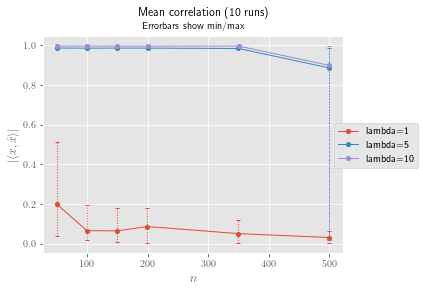

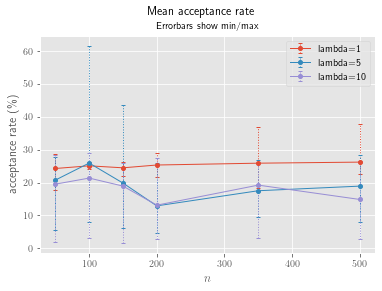

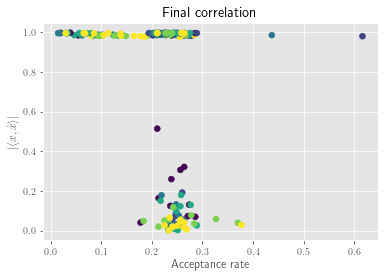

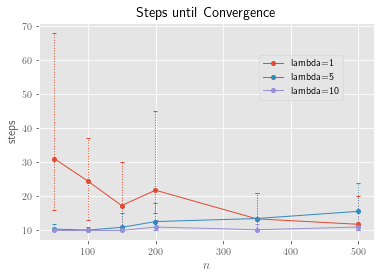

In [14]:
import matplotlib.pyplot as plt
from matplotlib import container
import numpy as np
import pickle
import os
from itertools import chain

# Loading the data
runs = [
        "dim/lambda1_d3_05-09_21:45.pkl",
        "dim/lambda5_d3_06-09_00:36.pkl",
        "dim/lambda10_d3_06-09_03:20.pkl",
]
results = []
for run in runs:
    with open(f"./data/{run}", "rb") as f:
        results += [(pickle.load(f))]

run = run[16:]
if not os.path.exists(f"figures/dim/{run}"):
    os.makedirs(f"figures/dim/{run}")

lambdas = np.array([l['results'][0]['lmbda'] for l in results])
lambdas.sort()
n_lambdas = len(lambdas)
dims = np.array(results[0]['params']['dims'])
n_dims = len(dims)

correlations = [d['correlations'] for l in results for d in l['results']]
final_correlations = np.abs([run[-1] for reps_list in correlations for run in reps_list]).reshape(n_dims * n_lambdas, -1)
acceptance_rates = np.array([d['acceptance_rates'] for l in results for d in l['results']])
n_runs = acceptance_rates.shape[1]

labels = {i: f"lambda={lmbda}" for i, lmbda in enumerate(lambdas)}
n_reps = acceptance_rates.shape[1]

steps = np.array([len(corr_array) for corrs_list in correlations for corr_array in corrs_list]).reshape(n_dims * n_lambdas, -1)


# plotting
with plt.style.context("ggplot"):
    plt.rc("text", usetex=True)

    # correlation plot
    fig, axes = plt.subplots(nrows=1)

    for i in range(n_lambdas):
        means = final_correlations.mean(axis=1)[i * n_dims : (i + 1) * n_dims]
        mins = final_correlations.min(axis=1)[i * n_dims : (i + 1) * n_dims]
        maxs = final_correlations.max(axis=1)[i * n_dims : (i + 1) * n_dims]
        eb = axes.errorbar(
            (i - 2) * 0.05 + dims,
            means,
            yerr=[means - mins, maxs - means],
            label=labels[i],
            fmt="o-",
            linewidth=1,
            markersize=4,
            capsize=2,
            elinewidth=1,
        )
        eb[-1][0].set_linestyle(":")
    plt.suptitle(f"Mean correlation ({n_reps} runs)", fontsize=12)
    plt.title("Errorbars show min/max", fontsize=10)
    axes.set_xlabel(r"$n$")
    axes.set_ylabel(r"$|\langle x, \hat{x}\rangle |$")

    handles, labels = axes.get_legend_handles_labels()
    handles = [
        h[0] if isinstance(h, container.ErrorbarContainer) else h for h in handles
    ]

    fig.legend(handles, labels, loc=7)
    fig.subplots_adjust(right=0.82)
    plt.savefig(f"figures/dim/{run}/correlations.png", dpi=900)

    # acceptance rate plot
    plt.figure()

    for i in range(n_lambdas):
        means = 100 * acceptance_rates.mean(axis=1)[i * n_dims : (i + 1) * n_dims]
        mins = 100 * acceptance_rates.min(axis=1)[i * n_dims : (i + 1) * n_dims]
        maxs = 100 * acceptance_rates.max(axis=1)[i * n_dims : (i + 1) * n_dims]
        eb = plt.errorbar(
            (i - 2) * 0.05 + dims,
            means,
            yerr=[means - mins, maxs - means],
            label=labels[i],
            fmt="o-",
            linewidth=1,
            markersize=4,
            capsize=2,
            elinewidth=1,
        )
        eb[-1][0].set_linestyle(":")
    plt.suptitle("Mean acceptance rate", fontsize=12)
    plt.title("Errorbars show min/max", fontsize=10)

    plt.xlabel(r"$n$")
    plt.ylabel(r"acceptance rate (\%)")

    plt.legend()
    plt.savefig(f"figures/dim/{run}/acceptance_rates.png", dpi=900)

    # acceptance rate vs. final correlation
    plt.figure()

    pallete = {50: 1, 100: 2, 150: 3, 200: 4, 350: 5, 500: 6}
    c = [pallete[n] for _ in range(n_lambdas) for n in dims for _ in range(n_reps)]
    plt.scatter(acceptance_rates.reshape(-1), final_correlations.reshape(-1), c=c)
    eb[-1][0].set_linestyle(":")
    plt.title(f"Final correlation")
    plt.xlabel(f"Acceptance rate")
    plt.ylabel(r"$|\langle x, \hat{x}\rangle |$")

    handles, labels = axes.get_legend_handles_labels()
    handles = [
        h[0] if isinstance(h, container.ErrorbarContainer) else h for h in handles
    ]

    fig.legend(handles, labels, loc=7)
    fig.subplots_adjust(right=0.82)
    plt.savefig(f"figures/dim/{run}/acc_rate_vs_correlation.png", dpi=900)

    # dim vs. total steps
    fig, axes = plt.subplots(nrows=1)
    for i in range(n_lambdas):
        means = means = steps.mean(axis=1)[i * n_dims : (i + 1) * n_dims]
        quantiles = np.quantile(steps, q=[0,1], axis=1)[:,i * n_dims : (i + 1) * n_dims]
        eb = axes.errorbar(
            (i - 2) * 0.05 + dims,
            means,
            yerr=[means - quantiles[0], quantiles[1] - means],
            label=labels[i],
            fmt="o-",
            linewidth=1,
            markersize=4,
            capsize=2,
            elinewidth=1,
        )
        eb[-1][0].set_linestyle(":")
    plt.title(r"Steps until Convergence")
    axes.set_xlabel(r"$n$")
    axes.set_ylabel(r"steps")
    handles, labels = axes.get_legend_handles_labels()
    handles = [
        h[0] if isinstance(h, container.ErrorbarContainer) else h for h in handles
    ]
    fig.legend(handles, labels, loc=(0.68,.64))
    plt.savefig(f"figures/dim/{run}/steps.pdf", format="pdf")